# Наилучшее среднеквадратичное приближение функции

In [1]:
import random
# модули для математических операций
import math
import numpy as np
import system_solvers # алгоритмы из ВМА
import scipy.integrate as integrate # вычисление интегралов
import scipy.special as special
# модули для визуализации
import matplotlib.pyplot as plt
import seaborn as sns
# модули для работы с данными
import pandas as pd
pd.options.display.float_format ='{:,.7f}'.format

# Постановка задачи

Проблема наилучшего среднеквадратичного приближения формулируется следующим образом. Пусть задана функция $f(x) = x\cos x$ на отрезке $[a,b]$. Тогда необходимо
1. имея некоторую функцию $f(x)$, которую трудно вычислить, мы будем заменять ее другой функцией $\varphi(x,a)$, где $a$ --- векторный параметр, которую легко вычислить;
2. имея значения функции $f(x_i)$ в одних точках, найти значения функции в других точках.

In [2]:
def f(x):
    return x*np.cos(x)

# Общие сведения о решении задачи

Задачи приближения функции можно классифицировать на линейные и нелинейные. Задача считается линейной, если множество, из которого мы берем функцию $\varphi(x)$ является линейным. Соответственно при решении задачи мы будем также разделять способы построения приближения на линейные и нелинейные.

Сперва рассмотрим алгоритм построения линейного наилучшего среднеквадратичного приближения. Поскольку в данном случае мы строим среднеквадратичное приближение в линейном пространстве, то в качестве такого пространства будем рассматривать гильбертово пространство $H$, так как из теории функционального анализа известно, что существует единственный элемент наилучшего приближения в таком пространстве.

Пусть подпространство $\Phi$ порождено элементами $\varphi_0,\varphi_1,\ldots, \varphi_n$. Обозначим $\Phi_0$ --- элемент наилучшего приближения к $f$ в $\Phi$. Поскольку $\Phi_0 \in \Phi$, то он представим в виде линейной комбинации $$\Phi_0 = \sum_{i=0}^{n}c_i\varphi_i.$$
 Задача отыскания $\Phi_0$ равносильна отысканию коэффициентов $c_0,\ldots, c_n$ таких, чтобы выполнялось равенство $$(f-\Phi_0, \varphi) = 0\ \forall \varphi \in \Phi.$$
 Последнее равенство равносильно системе условий вида $$(f-\Phi_0, \varphi_j) = 0, j = 0,1,\ldots, n.$$
 Эти равенства представляют собой систему линейных алгебраических уравнений вида $$\begin{cases}
 	c_0(\varphi_0,\varphi_0) + \ldots + c_n(\varphi_n, \varphi_0) = (f,\varphi_0),\\
 	\vdots\\
 	c_0(\varphi_0,\varphi_n) + \ldots + c_n(\varphi_n, \varphi_n) = (f,\varphi_n)
 \end{cases}$$
 
  Таким образом, для построения элемента наилучшего приближения в гильбертовом пространстве необходимо сделать два пункта
1. выбрать систему базисных элементов $\varphi_0,\ldots, \varphi_n$ подпространства $\Phi$;
2. составить и решить систему указанную выше.

 Пусть $H = L_2(p)[a,b]$ --- пространство вещественнозначных функций интегрируемых с квадратом на отрезке $[a,b]$ по весу $p(x)$. Норма в этом пространстве задается как $$||f|| = (f,f)^{\frac12} = \Big(\int\limits_a^b p(x) f^2(x)dx\Big)^{\frac12}.$$
Скалярное произведение как $$(f,g) = \int\limits_a^b p(x) f(x) g(x)dx.$$
При этом вес $p(x)$ удовлетворяет условиям:
1. $p(x) \geq 0$ $\forall x \in [a,b]$;
2. $p(x)$ обращается в ноль не более чем на множестве меры нуль.

# Построение линейного наилучшего среднеквадратичного приближения

## Наилучшее полиномиальное среднеквадратичное приближение для непрерывно заданной функции
### Теоретические выкладки
В качестве системы базисных функций возьмем функции $1, x, \ldots, x^n$, или $\varphi_i = x^i$, $i=\overline{0,n}$. Обобщенный многочлен в этом случае превращается в алгебраический многочлен вида $$\varphi = P_n(x) = \sum_{i=0}^{n}c_ix^i,\quad c_i \in\mathbb{R}$$
Согласно общей теории существует единственный элемент $\varphi^* = P_n^*(x)$, который дает наилучшее приближение данной функции $f$ в пространстве $H$.
Для того, чтобы задать $P_n^*$ нужно решить систему с выбранными базисными функциями $\varphi_i$, которая в данном случае примет следующий вид $$\begin{cases}
 	c_0s_0 + c_1s_1 + \ldots + c_ns_n = m_0,\\
 	c_0s_1 + c_1s_2 + \ldots + c_ns_{n+1} = m_1,\\
 	\vdots\\
 	c_0s_n + c_1s_{n+1} + \ldots + c_ns_{2n} = m_n.
 \end{cases}$$
 $$s_i = \int\limits_a^b p(x) x^i dx,\quad m_j= \int\limits_a^b p(x) f(x) x^j dx,\quad i=\overline{0,2n}, j=\overline{0,n}.$$

### Построение приближения многочленом первой степени
Попробуем построить приближение функции $f(x) = x\cos x$ заданной на отрезке $[a,b]=[0, 1]$ с помощью линейной функции $$\varphi(x) = c_0 + c_1x.$$ Возьмем вес $p(x) = 1$.
Для построения приближающей функции нам необходимо решить систему
$$\begin{cases}
c_0 s_0 + c_1 s_1 = \int\limits_{0}^1 x\cos x dx,\\
c_0 s_1 + c_1 s_2 = \int\limits_{0}^1 x^2\cos x dx;
\end{cases}$$
где $$s_i = \int\limits_a^b x^idx = \dfrac{x^{i+1}}{i+1}\Big|_a^b =\dfrac{b^{i+1}}{i+1} -\dfrac{a^{i+1}}{i+1} = \dfrac{1}{i+1}$$
Предварительно построим алгоритм, который будет составлять матрицу $$S(n, a,b) = \begin{pmatrix}s_0 & s_1 & \dots & s_n\\ s_1 & s_2 & \dots & s_{n+1} \\ \vdots & \vdots & \ddots & \vdots \\ s_n & s_{n+1} & \dots & s_{2n}\end{pmatrix}$$
Таким образом, мы можем компьютерно сразу вычислять значение матрицы $S$, избегая подсчета достаточно простых интегралов.

In [3]:
def s(i, a, b):
    return b**(i+1) / (i + 1) - a**(i+1) / (i + 1)

def S(n, a, b):
    S = [[None]*n for _ in range(n)]
    for i in range(n):
        for j in range(n):
            S[i][j] = s(i+j, a, b)
    return S

In [4]:
print(*S(2, 0, 1), sep='\n')

[1.0, 0.5]
[0.5, 0.3333333333333333]


Вычислим значения каждого из интегралов в правой части
$$\int\limits_{0}^1 x\cos x dx = x\sin x \Big|_{0}^1 + \cos x\Big|_{0}^1 = \sin1 + \cos1 - 1,$$
$$\int\limits_{0}^1 x^2\cos x dx = (x^2-2)\sin x \Big|_{0}^1 +2x\cos x\Big|_{0}^1 = -\sin1 +2 \cos1.$$
Взяв ранее построенный алгоритм метода отражений с выбором главного элемента по строке, найдем решение получившейся системы уравнений относительно $c_i$. В качестве результата работы функция возвращает решения $c_i$ СЛАУ, вектор невязки и определитель матрицы.

In [5]:
solution = system_solvers.reflection_method( 
    S(2, 0, 1),
    
    [np.sin(1) + np.cos(1) - 1, 
    -np.sin(1) + 2*np.cos(1)])

print(*solution, sep='\n')

[0.09229140113384744, 0.5789637790843772]
[0.0, 6.938893903907228e-18]
-0.08333333333333336


In [6]:
coefficients = solution[0]

Построим многочлен с соответствующими коэффициентами: $$\varphi(x) = 0.09229 + 0.57896x.$$
Зададим программно функцию, которая вычислять значения многочленов в соответствии с коэффициентами.

In [7]:
def phi(x, coefficients):
    phi = 0
    n = len(coefficients)
    for i in range(n):
        phi += x**i * coefficients[i]
    return phi

Теперь построим график исходной функции и построенного приближения

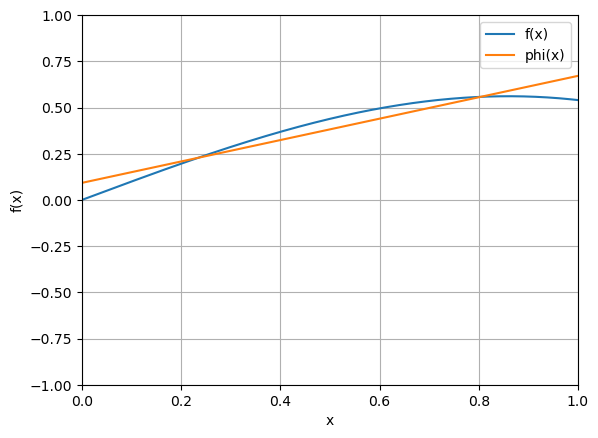

In [8]:
x = np.linspace(0, 1, 10000)

fig, ax = plt.subplots()
ax.plot(x, f(x), label='f(x)')
ax.plot(x, phi(x, coefficients), label='phi(x)')
ax.set_xlim(0, 1)
ax.set_ylim(-1, 1)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

Рассчитаем среднеквадратичное отклонение функции от ее приближения:
$$|| f(x) - \varphi(x) || ^2 = \int\limits_0^1 (x\cos x - 0.09229 - 0.57896x)^2\ dx.$$
Вычисление этого интеграла реализуем компьютерными методами интегрирования, так как аналитическое интегрирование будет достаточно объемным *(насколько удалось выяснить, данный компьютерный алгоритм реализует метод квадратур Кертиса-Кленшоу с многочленами Чебышева)*. В качестве результата функция возвращает значение интеграла и погрешность его вычисления.

In [9]:
integrate.quad(lambda x: (f(x) - phi(x, coefficients))**2, 0, 1)

(0.0026080356185100182, 2.8955011927123335e-17)

Таким образом, $$||f(x) - \varphi(x)||^2 = 0.00261.$$

Попробуем расширить отрезок до $[0,2]$ и посмотреть, как будет вести себя приближающая функция:

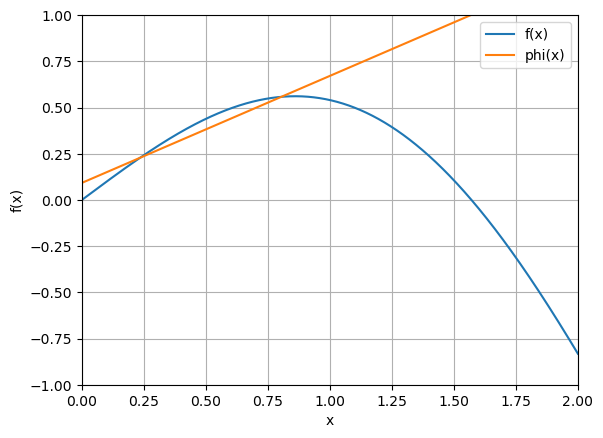

In [10]:
x = np.linspace(0, 2, 10000)

fig, ax = plt.subplots()
ax.plot(x, f(x), label='f(x)')
ax.plot(x, phi(x, coefficients), label='phi(x)')
ax.set_xlim(0, 2)
ax.set_ylim(-1, 1)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

Заметим, что при попытке увеличить отрезок построенное нами приближение больше не подходит и нам следует его перестроить. Сперва перестроим приближающую функцию все еще на основе полинома первой степени и посмотрим на результат. После этого попробуем построить приближающую функцию на основе многочлена второй степени.

Расширяя рассматриваемую область, мы получим, что матрица $S$ теперь изменится. Вычислим ее значение:

In [11]:
print(*S(2, 0, 2), sep='\n')

[2.0, 2.0]
[2.0, 2.6666666666666665]


Также пересчитаем аналитически интегралы, которые находятся в правой части системы:
$$\int\limits_{0}^2 x\cos x dx = 2\sin2 + \cos2 - 1,$$
$$\int\limits_{0}^2 x^2\cos x dx = 2\sin2 +4 \cos2.$$

Тогда методом отражений найдем коэффициенты $c_i$:

In [12]:
solution = system_solvers.reflection_method( 
    S(2, 0, 2),
    
    [2*np.sin(1) + np.cos(2) - 1, 
    2*np.sin(2) + 4*np.cos(2)])

print(*solution, sep='\n')

[0.30257900494311046, -0.16918143840878522]
[-1.6653345369377348e-16, -6.938893903907228e-17]
-1.3333333333333344


Таким образом, приближающая функция будет иметь вид $$\varphi(x) = 0.30258 -0.16918 x.$$

In [13]:
coefficients = solution[0]

Построим новый график исходной функции и ее приближения

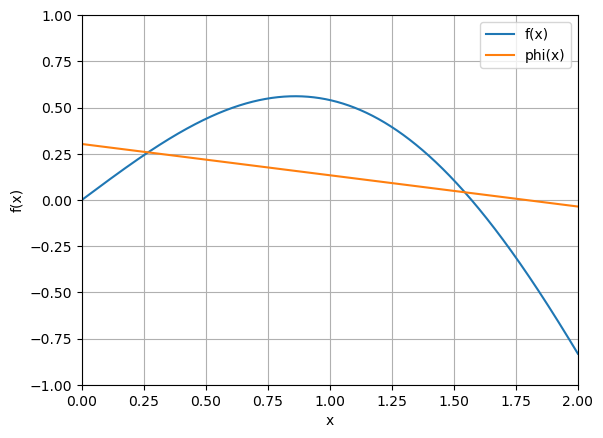

In [14]:
x = np.linspace(0, 2, 10000)

fig, ax = plt.subplots()
ax.plot(x, f(x), label='f(x)')
ax.plot(x, phi(x, coefficients), label='phi(x)')
ax.set_xlim(0, 2)
ax.set_ylim(-1, 1)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

Заметно, что теперь линейная функция приближаего значение исходной функции гораздо хуже. Для того, чтобы попытаться описать исходную функцию лучшим образом на выбранном отрезке, повысим степень приближающего многочлена.

### Построение приближения многочленом второй степени
Попробуем построить приближение функции $f(x) = x\cos x$ заданной на отрезке $[a,b]=[0, 2]$ с помощью квадратичной функции $$\varphi(x) = c_0 + c_1x +c_2x^2.$$ Возьмем вес $p(x) = 1$.
Для построения приближающей функции нам необходимо решить систему
$$\begin{cases}
c_0 s_0 + c_1 s_1 + c_2s_2 = \int\limits_{0}^2 x\cos x dx,\\
c_0 s_1 + c_1 s_2 + c_2 s_3 = \int\limits_{0}^2 x^2\cos x dx,\\
c_0 s_2 + c_1 s_3 + c_2s_4 = \int\limits_{0}^2 x^3\cos x dx;\\
\end{cases}$$
где $$s_i = \int\limits_a^b x^idx = \dfrac{x^{i+1}}{i+1}\Big|_0^2 = \dfrac{2^{i+1}}{i+1}$$

In [15]:
S(3, 0, 2)

[[2.0, 2.0, 2.6666666666666665],
 [2.0, 2.6666666666666665, 4.0],
 [2.6666666666666665, 4.0, 6.4]]

Вычислим значения каждого из интегралов
$$\int\limits_{0}^2 x\cos x dx = 2\sin2 + \cos2 - 1,$$
$$\int\limits_{0}^2 x^2\cos x dx = 2\sin2 +4 \cos2,$$
$$\int\limits_{0}^2 x^3\cos x dx= x(x^2-6)\sin x + 3(x^2-2)\cos x = 6 - 4\sin2 + 6\cos2.$$
Решим систему методом отражений и найдем значения коэффициентов.

In [16]:
solution = system_solvers.reflection_method( 
    S(3, 0, 2),
    [2*np.sin(2) + np.cos(2) - 1, 
    2*np.sin(2) + 4*np.cos(2),
    6-4*np.sin(2) + 6*np.cos(2)])

solution

([-0.07781671489208224, 1.582443699256859, -0.9775522318594997],
 [-1.6653345369377348e-16, 0.0, -9.71445146547012e-17],
 0.23703703703703582)

In [17]:
coefficients = solution[0]

Получаем многочлен $$\varphi(x) = -0.07781 + 1.58244x -0.97755x^2.$$
Тогда имеем следующий график исходной функции и получившегося приближения

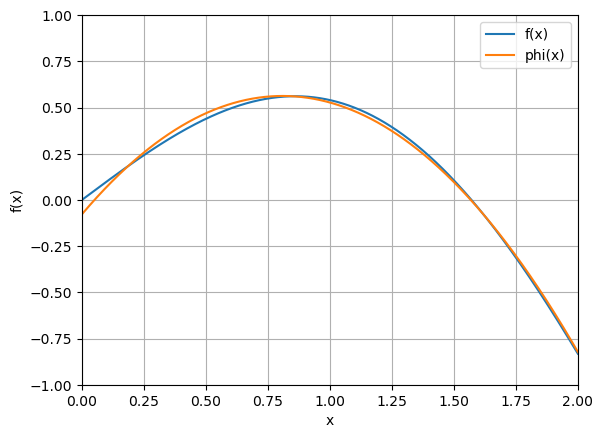

In [18]:
x = np.linspace(0, 2, 10000)

fig, ax = plt.subplots()
ax.plot(x, f(x), label='f(x)')
ax.plot(x, phi(x, coefficients), label='phi(x)')
ax.set_xlim(0, 2)
ax.set_ylim(-1, 1)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

Аналогично с помощью компьютерных методов вычислим значение среднеквадратичного отклонения:

In [19]:
integrate.quad(lambda x: (f(x) - phi(x, coefficients))**2, 0, 2)

(0.0008571742894623929, 9.516546322778573e-18)

То есть $$|| f(x) - \varphi(x) || ^2 = 0.00086,$$
что меньше, чем в предыдущем случае. Также из графика можно заметить, что обе функции лежат достаточно близко друг к другу. Однако при попытке расширить отрезок, мы получим уже расхождение реальной функции с ее приближением. Например, взяв отрезок $[0, 5]$, можно увидет следующий результат.

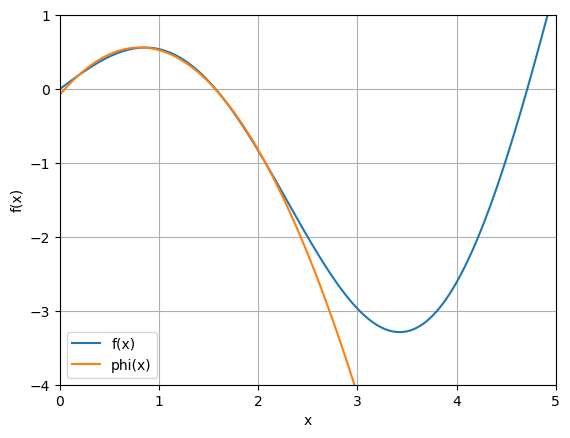

In [20]:
x = np.linspace(0, 5, 10000)

fig, ax = plt.subplots()
ax.plot(x, f(x), label='f(x)')
ax.plot(x, phi(x, coefficients), label='phi(x)')
ax.set_xlim(0, 5)
ax.set_ylim(-4, 1)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

### Построение приближения многочленом третьей степени
Попробуем построить приближение функции $f(x) = x\cos x$ заданной на отрезке $[a,b]=[0, 5]$ с помощью кубической функции $$\varphi(x) = c_0 + c_1x +c_2x^2 + c_3x^3.$$ Возьмем вес $p(x) = 1$.
Для построения приближающей функции нам необходимо решить систему
$$\begin{cases}
c_0 s_0 + c_1 s_1 + c_2s_2 + c_3 s_3 = \int\limits_{0}^5 x\cos x dx,\\
c_0 s_1 + c_1 s_2 + c_2 s_3 + c_3 s_4 = \int\limits_{0}^5 x^2\cos x dx,\\
c_0 s_2 + c_1 s_3 + c_2s_4 + c_3 s_5 = \int\limits_{0}^5 x^3\cos x dx,\\
c_0 s_3 + c_1 s_4 + c_2s_5 + c_3 s_6 = \int\limits_{0}^5 x^4\cos x dx;\\
\end{cases} \Longleftrightarrow Sc = M.$$
Интегралы, которые получаются в правой части, теперь мы также будем вычислять с помощью компьютерных методов. Определим функцию для вычисления интегралов такого вида:

In [21]:
def m(i, a, b):
    return integrate.quad(lambda x: x**i * f(x), a, b)

Определим функцию, которая будет возвращать два вектора: вектор значений интегрилов $m_i$ и вектор соответствующих погрешностей:

In [22]:
def M(n, a, b):
    M = [[None]*n for _ in range(n)]
    r = [[None]*n for _ in range(n)]
    for i in range(n):
        M[i], r[i] = m(i, a, b)
    return M, r

Таким образом, составим матрицу $S$ и столбец $M$:

In [23]:
S(4, 0, 5)

[[5.0, 12.5, 41.666666666666664, 156.25],
 [12.5, 41.666666666666664, 156.25, 625.0],
 [41.666666666666664, 156.25, 625.0, 2604.1666666666665],
 [156.25, 625.0, 2604.1666666666665, 11160.714285714286]]

In [24]:
print(*M(4, 0, 5), sep='\n')

[-5.510959187852467, -19.21863646261992, -65.52511529603555, -226.8729413814093]
[7.853941976246976e-14, 2.4612880122411775e-13, 8.463654806816023e-13, 3.062228274693564e-12]


Теперь, поскольку мы можем компьютерными методами вычислять и матрицу $S$ и столбец $M$, то у нас есть возможность сразу составлять СЛАУ и решать ее методом Гаусса, передавая нужные нам аргументы:

In [25]:
solution = system_solvers.reflection_method( 
    S(4, 0, 5),
    M(4, 0, 5)[0])

print(*solution, sep='\n')

[-0.3742968795050088, 3.0552988527687113, -2.4459645566952206, 0.38454066823913274]
[-2.842170943040401e-14, 3.552713678800501e-15, -7.993605777301127e-15, -1.5654144647214707e-14]
-25229.47927000352


In [26]:
coefficients = solution[0]

Построим график исходной функции и многочлена с подставленными коэффициентами:

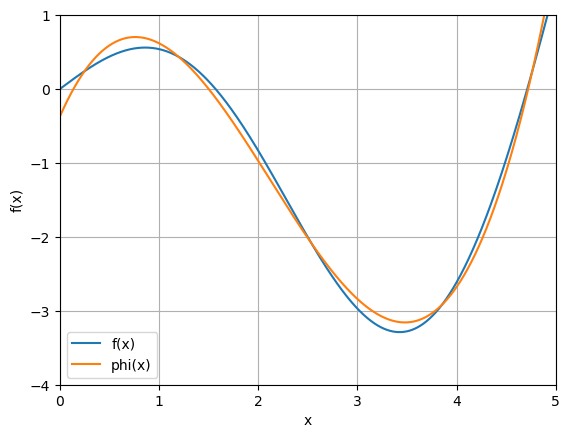

In [27]:
x = np.linspace(0, 5, 10000)

fig, ax = plt.subplots()
ax.plot(x, f(x), label='f(x)')
ax.plot(x, phi(x, coefficients), label='phi(x)')
ax.set_xlim(0, 5)
ax.set_ylim(-4, 1)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

Вычислим значение среднеквадратичного отклонения в данном случае:

In [28]:
integrate.quad(lambda x: (f(x) - phi(x, coefficients))**2, 0, 5)

(0.0780706234331382, 7.829307048097033e-09)

Таким образом, $$||f(x) - \varphi(x)||^2 = 0.07807,$$
что оказалось выше, чем в предыдущем случае. Однако из графика также можно заметить, что сейчас приближающая функция не описывает исходную настолько точно, как это было в предыдущем случае на более коротком отрезке.

Если попробовать взять еще более широкий отрезок $[-1, 7]$, то заметим, что приближающая функция снова не может подстроиться под поведение исходной функции.

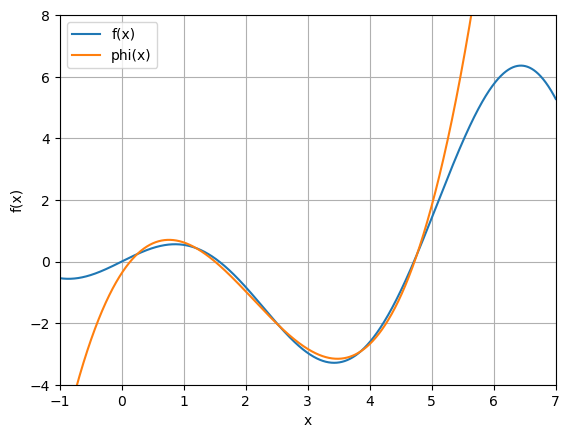

In [29]:
x = np.linspace(-1, 7, 10000)

fig, ax = plt.subplots()
ax.plot(x, f(x), label='f(x)')
ax.plot(x, phi(x, coefficients), label='phi(x)')
ax.set_xlim(-1, 7)
ax.set_ylim(-4, 8)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

Попробуем построить приближение уже на отрезке $[-1, 7]$ многочленом четвертой степени. 

### Построение приближения многочленами четвертой  и пятой степени
Попробуем построить приближение функции $f(x) = x\cos x$ заданной на отрезке $[a,b]=[-1, 7]$ с помощью многочлена 4-ой степени $$\varphi(x) = c_0 + c_1x +c_2x^2 + c_3x^3 +c_4x^4.$$ Возьмем вес $p(x) = 1$.
В данном случае мы уже не будем выписать вид СЛАУ, которая получится. Расширять по аналогии ее можно до бесконечности. Также мы избегаем всех аналитических выводов, а будем пользоваться лишь компьютерными методами вычисления интегралов и решения системы. Сразу найдем решение СЛАУ:

In [30]:
solution = system_solvers.reflection_method( 
    S(5, -1, 7),
    M(5, -1, 7)[0])

print(*solution, sep='\n')

[1.080805976203486, 0.8968489817746292, -2.331123760157613, 0.6859098499198989, -0.05070308989907286]
[-1.8189894035458565e-12, 3.410605131648481e-13, -5.542233338928781e-13, 2.595701431573616e-13, 2.389199948993337e-13]
141644365345.4911


Заметим, что вектор невязки все еще достаточно мал по модулю, однако стоит обратить внимание на то, что с повышением порядка приближающего многочлена на каждую единицу вектор невязки также увеличивается на один десяток. Это может свидетельствовать о том, что процесс мы не сможем продолжать до бесконечности с достаточной точностью. С каждым шагом повышения степени полинома погрешность вычислений будет становится выше.

In [31]:
coefficients = solution[0]

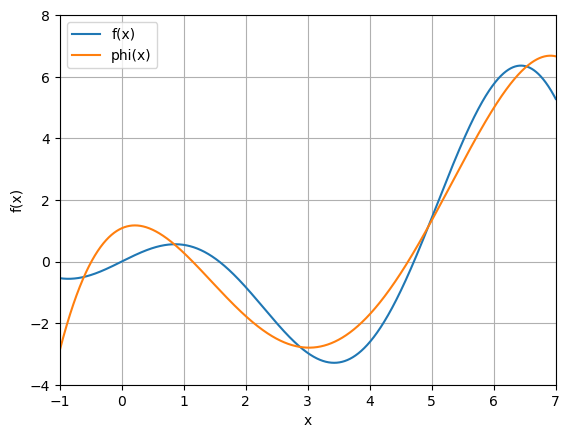

In [32]:
x = np.linspace(-1, 7, 10000)

fig, ax = plt.subplots()
ax.plot(x, f(x), label='f(x)')
ax.plot(x, phi(x, coefficients), label='phi(x)')
ax.set_xlim(-1, 7)
ax.set_ylim(-4, 8)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

Из графика заметно, что в этот раз приближение оказалось уже не таким точным, как было до этого. Можем также посмотреть значение среднеквадратичного отклонения:

In [33]:
integrate.quad(lambda x: (f(x) - phi(x, coefficients))**2, -1, 7)

(4.1322788300957125, 1.0445481285481506e-12)

Заметно, что отклонение куда больше, чем во все предыдущие разы. 

Попробуем повысить степень приближающего многочлена до пятой. Тогда решение СЛАУ будет иметь вид:

In [34]:
solution = system_solvers.reflection_method( 
    S(6, -1, 7),
    M(6, -1, 7)[0])

print(*solution, sep='\n')

[0.12352913068311086, 1.1452189636870782, -0.3862605120108228, -0.5910205655317514, 0.21450553484871027, -0.01768057498319053]
[2.9103830456733704e-11, -1.3642420526593924e-12, -2.7000623958883807e-13, 2.220446049250313e-13, -3.9968028886505635e-14, 1.1524114995609125e-13]
-1741788396519914.8


In [35]:
coefficients = solution[0]

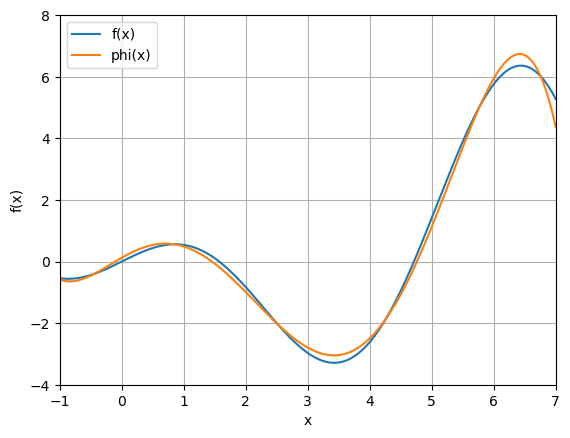

In [36]:
x = np.linspace(-1, 7, 10000)

fig, ax = plt.subplots()
ax.plot(x, f(x), label='f(x)')
ax.plot(x, phi(x, coefficients), label='phi(x)')
ax.set_xlim(-1, 7)
ax.set_ylim(-4, 8)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

Теперь уже мы заметно улучшили приближение. Приближающая функция гораздо лучше описывает реальную зависимость. Убедимся в этом, вычислив значение среднеквадратичного отклонения:

In [37]:
integrate.quad(lambda x: (f(x) - phi(x, coefficients))**2, -1, 7)

(0.2882303250138847, 6.640360136755952e-12)

Заметим, что хоть значение отклонения выше, чем во всех предыдущих случаях, однако оно все же ниже, чем при попытке приблизить функцию полиномом четвертой степени.

### Вывод

Для того, чтобы сформировать вывод, значительно расширим область задания исходной функции и построим ее график:

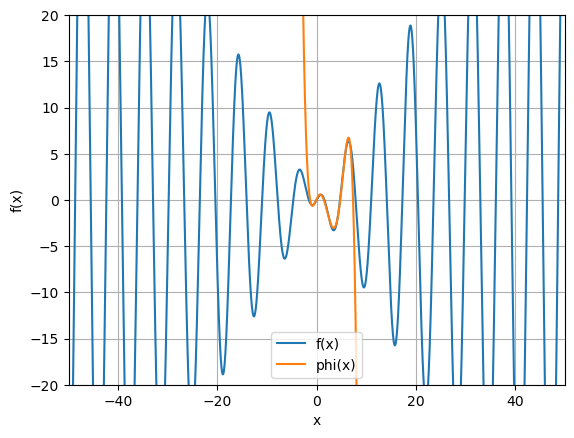

In [38]:
x = np.linspace(-50, 50, 10000)

fig, ax = plt.subplots()
ax.plot(x, f(x), label='f(x)')
ax.plot(x, phi(x, coefficients), label='phi(x)')
ax.set_xlim(-50, 50)
ax.set_ylim(-20, 20)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

Отсюда становится очевиден тот факт, что, вообще говоря, мы можем пытаться повышать степень приближающего многочлена до бесконечности. Все зависит лишь от той области, на которой нам нужно приблизить исходную функцию. Мы пронаблюдали, что на достаточно малом отрезке $[0,1]$ нам хватило приближения с помощью линейной функции. Однако с увеличением рассматриваемой области нам приходилось также повышать степень многочлена, чтобы приближение оставалось достаточно значимым в смысле среднеквадратичного отклонения.

## Наилучшее тригонометрическое среднеквадратичное приближение для непрерывно заданной функции
### Теоретические выкладки
В качестве альтернативной системы базисных функций возьмем функции $1, \cos x, \sin x,\ldots, \cos nx, \sin nx$. Обобщенный многочлен в этом случае превращается в алгебраический многочлен вида $$\varphi = P_n(x) = c_0 + \sum_{i=0}^{n}c_{2i+1}\cos i x + c_{2i+2} \sin i x,\quad  c_i \in\mathbb{R}$$
Согласно общей теории существует единственный элемент $\varphi^* = P_n^*(x)$, который дает наилучшее приближение данной функции $f$ в пространстве $H$.
Для того, чтобы задать $P_n^*$ нужно решить систему с выбранными базисными функциями $\varphi_i$, которая в данном случае примет следующий вид $$\begin{cases}
 	c_0\int\limits_a^b p(x) dx + c_1\int\limits_a^b p(x) \cos x dx + c_2\int\limits_a^b p(x) \sin x dx + \ldots = \int\limits_a^b p(x) f(x) dx,\\
 	c_0\int\limits_a^b p(x) \cos x dx + c_1\int\limits_a^b p(x) \cos^2 x dx + c_2\int\limits_a^b p(x) \cos x \sin x dx + \ldots = \int\limits_a^b p(x) f(x) \cos xdx,\\
    c_0\int\limits_a^b p(x) \sin x dx + c_1\int\limits_a^b p(x) \cos x\sin x dx + c_2\int\limits_a^b p(x) \sin^2 x dx + \ldots = \int\limits_a^b p(x) f(x) \sin xdx,\\
 	\vdots
 \end{cases}$$

### Построение приближения тригонометрическими многочленами первой и второй степени

Попробуем построить приближение функции $f(x) = x\cos x$ заданной на отрезке $[a,b]=[0, 2]$ с помощью функции $$\varphi(x) = c_0 + c_1\cos x.$$ Возьмем вес $p(x) = 1$.
Для построения приближающей функции нам необходимо решить систему
$$\begin{cases}
c_0\int\limits_0^2 dx + c_1\int\limits_0^2 \cos x dx = \int\limits_0^2 x\cos x dx,\\
c_0\int\limits_0^2 \cos x dx + c_1\int\limits_0^2 \cos^2 x dx = \int\limits_0^2 x\cos^2 x dx;
\end{cases}$$

В данном случае все интегралы вычислим аналитически:
$$\int\limits_0^2 dx = 2,\quad \int\limits_0^2 \cos x dx = \sin 2,\quad \int\limits_0^2 \cos^2 x dx = \dfrac{x}{2} + \dfrac{1}{4}\sin 2x\Big|_0^2 = 1+\dfrac {1}{4}\sin 4.$$
$$\int\limits_0^2 x\cos x dx = -1 + 2\sin2 + \cos2,$$
$$ \int\limits_0^2 x\cos^2 x dx = \dfrac{x^2}{4} + \dfrac14x\sin2x + \dfrac18\cos2x\Big|_0^2 = \dfrac78 + \dfrac12\sin4 +\dfrac18\cos4.$$
Составим СЛАУ, указанную нами выше, для вычисления коэффициентов $c_0$ и $c_1$ и найдем ее решение методом отражений:

In [39]:
solution = system_solvers.reflection_method( 
    [[2, np.sin(2)],
    [np.sin(2), 1+1/4 * np.sin(4)]],
    
    [-1 + 2*np.sin(2) + np.cos(2), 
    7/8 + 1/2*np.sin(4) + 1/8*np.cos(4)])

print(*solution, sep='\n')

[-0.06411460368509926, 0.5836123679872173]
[0.0, -2.7755575615628914e-17]
-0.7947769419142302


In [40]:
coefficients = solution[0]

Тогда приближающая функция будет иметь вид $$\varphi(x) = -0.064114 + 0.58361\cos x.$$
Определим функцию, которая будем вычислять значение для построенного тригонометрического многочлена в точке $x$:

In [41]:
def phi(x, coefficients):
    phi = coefficients[0]
    n = len(coefficients)
    k=1
    for i in range(1, n):
        if i % 2 == 1:
            phi += np.cos(k*x) * coefficients[i]
        else :
            phi += np.sin(k*x) * coefficients[i]
            k+=1
    return phi



Построим график исходной и приближающей функций:

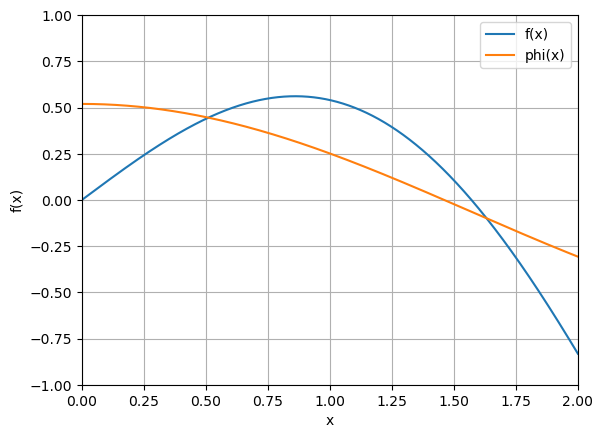

In [42]:
x = np.linspace(0, 2, 10000)

fig, ax = plt.subplots()
ax.plot(x, f(x), label='f(x)')
ax.plot(x, phi(x, coefficients), label='phi(x)')
ax.set_xlim(0, 2)
ax.set_ylim(-1, 1)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

Как можно заметить, приближение оказалось не очень точным. Очевидно среднеквадратичное отклонение будет достаточно велико. Попробуем добавить к линейной комбинации $\sin$ и посмотреть, изменится ли результат.

Пусть приближающая функция будет иметь вид $$\varphi(x) = c_0 + c_1\cos x+ c_2\sin x.$$ Возьмем вес $p(x) = 1$.
Для построения приближающей функции нам необходимо решить систему
$$\begin{cases}
c_0\int\limits_0^2 dx + c_1\int\limits_0^2 \cos x dx + \int\limits_0^2 \sin x dx =  \int\limits_0^2 x\cos x dx,\\
c_0\int\limits_0^2 \cos x dx + c_1\int\limits_0^2 \cos^2 x dx + \int\limits_0^2 \cos x \sin x dx = \int\limits_0^2 x\cos^2 x dx,\\
c_0\int\limits_0^2 \sin x dx + c_1\int\limits_0^2 \cos x\sin x dx + \int\limits_0^2 \sin^2 x dx = \int\limits_0^2 x\cos x\sin x dx;
\end{cases}$$

Интегралы мы не будем вычислять аналитически из-за того, что работа выйдет достаточно объемной. Для вычисления всех значений интегралов будем пользоваться компьютерными методами. Поэтому сразу найдем решение СЛАУ:

In [43]:
solution = system_solvers.reflection_method( 
    [
    [integrate.quad(lambda x: 1, 0, 2)[0], 
      integrate.quad(lambda x: np.cos(x), 0, 2)[0], 
      integrate.quad(lambda x: np.sin(x), 0, 2)[0]],
    [integrate.quad(lambda x: np.cos(x), 0, 2)[0], 
     integrate.quad(lambda x: (np.cos(x))**2, 0, 2)[0], 
     integrate.quad(lambda x: np.cos(x)*np.sin(x), 0, 2)[0]],
    [integrate.quad(lambda x: np.sin(x), 0, 2)[0], 
     integrate.quad(lambda x: np.cos(x)*np.sin(x), 0, 2)[0], 
     integrate.quad(lambda x: (np.sin(x))**2, 0, 2)[0]]
    ],
    
    [
    integrate.quad(lambda x: x*np.cos(x), 0, 2)[0], 
    integrate.quad(lambda x: x*(np.cos(x))**2, 0, 2)[0],
    integrate.quad(lambda x: x*np.cos(x)*np.sin(x), 0, 2)[0]
    ]
)

print(*solution, sep='\n')

[-1.5674646263197447, 1.4807527117272095, 1.5471083807572896]
[-6.661338147750939e-16, -5.551115123125783e-17, 2.7755575615628914e-17]
0.04199409616945784


In [44]:
coefficients = solution[0]

Получаем тригонометрический многочлен $$\varphi(x) = -1.56746 + 1.48075\cos x + 1.54710\sin x.$$

Построим график исходной функции и полученного приближения

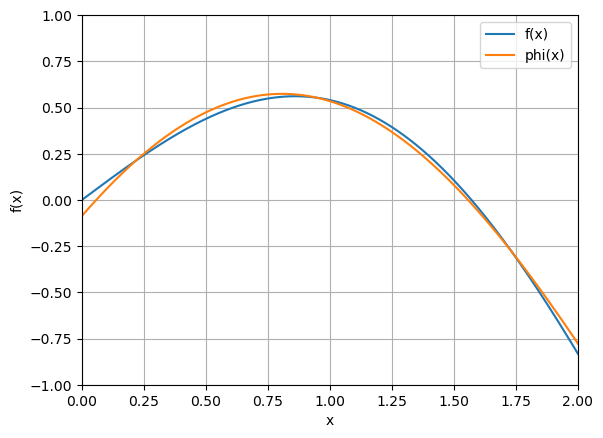

In [45]:
x = np.linspace(0, 2, 10000)

fig, ax = plt.subplots()
ax.plot(x, f(x), label='f(x)')
ax.plot(x, phi(x, coefficients), label='phi(x)')
ax.set_xlim(0, 2)
ax.set_ylim(-1, 1)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

Данное приближение оказалось намного лучше предыдущего. Для него имеет смысл рассчитать среднеквадратичное отклонение и сравнить его с результатом для алгебраического приближающего многочлена:

In [46]:
integrate.quad(lambda x: (f(x) - phi(x, coefficients))**2, 0, 2)

(0.0015061650361611373, 1.672179102031476e-17)

Полученное значение среднеквадратичного отклонения оказалось выше, чем для алгебраического полинома. 

Рассмотрим поведение данного приближения при попытке расширить рассматриваемую область:

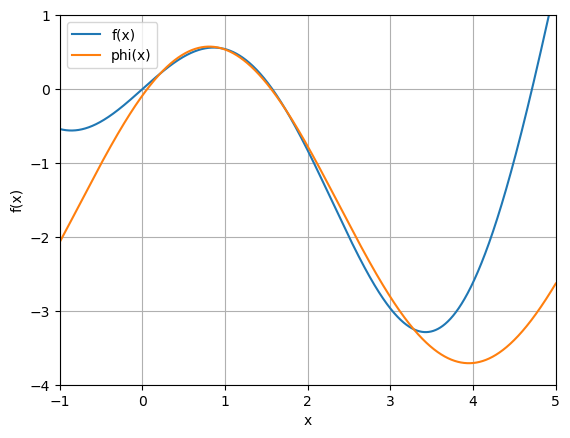

In [47]:
x = np.linspace(-1, 5, 10000)

fig, ax = plt.subplots()
ax.plot(x, f(x), label='f(x)')
ax.plot(x, phi(x, coefficients), label='phi(x)')
ax.set_xlim(-1, 5)
ax.set_ylim(-4, 1)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

Из графика мы можем увидеть, что при расширении рассматриваемой области приближение снова начинает сильно отклонятся от исходной функции. Следовательно, его нужно снова оптимизировать, добавив новое слагаемое с базисной функцией. В данном случае это будет функция $\cos2x$. И так далее. Сравним этот вариант с предыдущим:
* преимущество: приближающая функция построенная на тригонометрических базисных функциях, вообще говоря, периодическая; то есть теоретически через некоторое конечное число шагов мы сможем составить такую функцию, которая сможет приближать исходную функцию на всей числовой прямой.
* недостаток: вычисление значения коэффициентов в данном случае усложняется; вообще говоря, мы сможем построить итерационную функцию, которая будет образовывать матрицу $S$ и столбец $M$ для системы, однако из-за постоянного изменения степеней и аргументов функций $\cos$ и $\sin$ реализовать это будет сложнее.

## Наилучшее полиномиальное среднеквадратичное приближение для поточечно заданной функции
### Теоретические выкладки
Предположим, что нам известны значения функции $f(x)$ на конечном множестве точек отрезка $[a,b]$. Рассмотрим алгоритм построения среднеквадратичного приближения для таблично заданной функции.
Пусть в точках $x_i$ $$a\leq x_0 < x_1 <\ldots x_N \leq b$$ заданы значения функций $f(x_i)$, $i=\overline{0,N}$. Для функций заданных таблично возьмем скалярное произведение из евклидова пространства $$(f,g) = \sum_{i=0}^{N}p(x_i)f(x_i)g(x_i).$$
Тогда многочлен наилучшего среднеквадратичного приближения может быть построен по формуле $$\begin{cases}
 	c_0s_0 + c_1s_1 + \ldots + c_ns_n = m_0,\\
 	c_0s_1 + c_1s_2 + \ldots + c_ns_{n+1} = m_1,\\
 	\vdots\\
 	c_0s_n + c_1s_{n+1} + \ldots + c_ns_{2n} = m_n.
 \end{cases}$$
 $$s_k = \sum\limits_{i=0}^N p(x_i) x_i^k,\quad m_j= \sum\limits_{i=0}^N p(x_i) f(x_i) x_i^j,\quad k=\overline{0,2n}, j=\overline{0,n}.$$ 

### Построение приближения многочленом первой степени

Сперва определим функцию, которая будет случайным образом генерировать таблицу точек для функции $f(x)$:

In [48]:
def generate_coords(n_points=1000, a=0, b=1):
    data = {}
    x = np.linspace(a, b, num=10000)
    data['x'] = np.sort(np.random.choice(x, size=n_points, replace=True))
    data['f(x)'] = data['x']*np.cos(data['x'])
    return data

С помощью данной функции сгенерируем таблицу из 10 точек на отрезке $[0,1]$. Выведем первые 5 из них.

In [49]:
data = pd.DataFrame(generate_coords(10, 0, 1))
data.head(5)

,x,f(x)
0,0.0756076,0.0753916
1,0.1498150,0.1481369
2,0.1546155,0.1527710
3,0.1968197,0.1930198
4,0.2440244,0.2367948


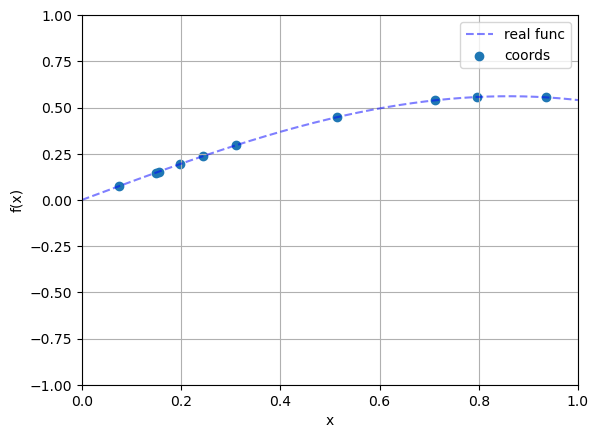

In [50]:
x = np.linspace(0, 1, 10000)

fig, ax = plt.subplots()
plt.plot(x, f(x), 'b--', alpha=0.5, label='real func')
ax.scatter(data['x'], data['f(x)'], label='coords')
ax.set_xlim(0, 1)
ax.set_ylim(-1, 1)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

Попробуем приблизить данную дискретно заданную функцию на отрезке $[0,1]$ с помощью многочлена первой степени $$\varphi(x) = c_0 + c_1x.$$

Для построения приближающей функции нам необходимо решить систему
$$\begin{cases}
c_0 s_0 + c_1 s_1 = \sum\limits_{i=0}^{10} x_i\cos x_i,\\
c_0 s_1 + c_1 s_2 = \sum\limits_{i=0}^{10} x^2_i\cos x_i;
\end{cases}$$
где $$s_k = \sum\limits_{i=0}^{10} x_i^k.$$
Аналогично с непрерывным случаем построим матрицу $$S(x, n) = \begin{pmatrix}s_0 & s_1 & \dots & s_n\\ s_1 & s_2 & \dots & s_{n+1} \\ \vdots & \vdots & \ddots & \vdots \\ s_n & s_{n+1} & \dots & s_{2n}\end{pmatrix}$$
Таким образом, мы можем компьютерно сразу вычислять значение матрицы $S$, избегая подсчета сумм вручную.

In [51]:
def s(x, k):
    return np.sum(x**k)

def S(x, n):
    S = [[None]*n for _ in range(n)]
    for i in range(n):
        for j in range(n):
            S[i][j] = s(x, i+j)
    return S

In [52]:
print(*S(data['x'], 2), sep='\n')

[10.0, 4.090309030903091]
[4.090309030903091, 2.5289910429186735]


Также аналогично с непрерывным случаем мы можем сразу вычислять столбец $M = (m_i)$, $$m_j= \sum\limits_{i=0}^{10} f(x_i) x_i^j$$

In [53]:
def m(x, j):
    return np.sum(f(x) * x**j)

def M(x, n):
    M = [[None]*n for _ in range(n)]
    for j in range(n):
        M[j] = m(x, j)
    return M

In [54]:
M(data['x'], 2)

[3.20048989670879, 1.8163084764814528]

Тогда методом отражений найдем решение СЛАУ $Sc = M$:

In [55]:
solution = system_solvers.reflection_method( 
    S(data['x'], 2),
    M(data['x'], 2))

print(*solution, sep='\n')

[0.07766390705144137, 0.5925837896065322]
[0.0, 5.551115123125783e-17]
-8.55928246089935


In [56]:
coefficients = solution[0]

In [57]:
def phi(x, coefficients):
    phi = 0
    n = len(coefficients)
    for i in range(n):
        phi += x**i * coefficients[i]
    return phi

Таким образом, имеем приближающую функцию $$\varphi(x) = 0.07766 + 0.59258x.$$
В качестве сравнения, вспомним, что в непрерывном случае мы получили функцию $$\psi(x) = 0.09229 + 0.57896x,$$ коэффициенты которой достаточно близки к тем, которые мы получили сейчас. Рассмотрим подробнее на графике (масштабы графика увеличены):

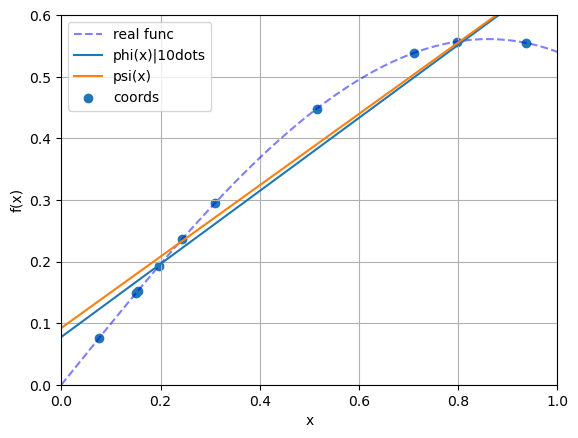

In [58]:
x = np.linspace(0, 1, 10000)

fig, ax = plt.subplots()
plt.plot(x, f(x), 'b--', alpha=0.5, label='real func')
ax.plot(x, phi(x, coefficients), label='phi(x)|10dots')
ax.plot(x, phi(x, [0.09229140113384744, 0.5789637790843772]), label='psi(x)')
ax.scatter(data['x'], data['f(x)'], label='coords')
ax.set_xlim(0, 1)
ax.set_ylim(-0., 0.6)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

Обе функции находятся достаточно близко друг к другу. Причем в зависимости от сгенерированных точек приближающая функция в дискретном случае может быть гораздо ближе к приближающей функции из непрерывного случая.

Рассчитаем среднеквадратичное отклонение $$||f(x) - \varphi(x)||^2=\sum\limits_{i=0}^N (f(x_i) - \varphi(x_i))^2.$$

In [59]:
np.sum((f(data['x']) - phi(data['x'], coefficients))**2)

0.016071773363706673

Заметим, что, несмотря на то, что графики находятся достаточно близко друг к другу, в непрерывном случае среднеквадратичное отклонение было меньше. 

Теперь попробуем задать таблицу по 20 и 30 точкам и сравнить результаты:

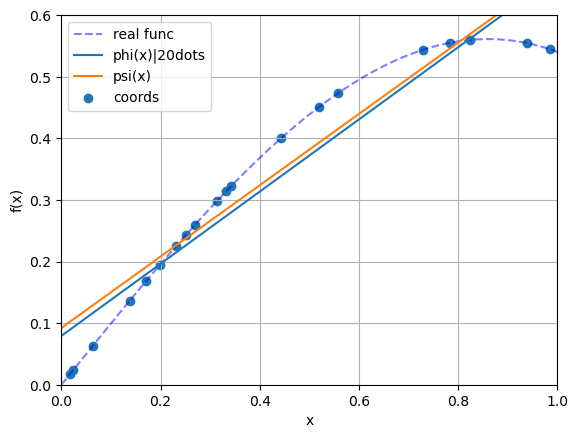

In [60]:
data = pd.DataFrame(generate_coords(20, 0, 1))
solution = system_solvers.reflection_method( 
    S(data['x'], 2),
    M(data['x'], 2))
coefficients = solution[0]

x = np.linspace(0, 1, 10000)

fig, ax = plt.subplots()
plt.plot(x, f(x), 'b--', alpha=0.5, label='real func')
ax.plot(x, phi(x, coefficients), label='phi(x)|20dots')
ax.plot(x, phi(x, [0.09229140113384744, 0.5789637790843772]), label='psi(x)')
ax.scatter(data['x'], data['f(x)'], label='coords')
ax.set_xlim(0, 1)
ax.set_ylim(-0., 0.6)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

In [61]:
np.sum((f(data['x']) - phi(data['x'], coefficients))**2)

0.051598741702633365

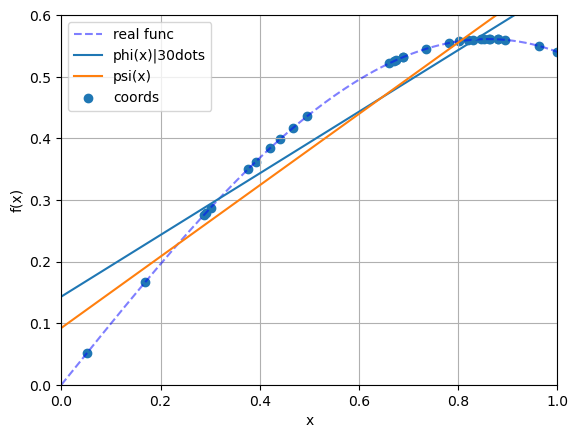

In [62]:
data = pd.DataFrame(generate_coords(30, 0, 1))
solution = system_solvers.reflection_method( 
    S(data['x'], 2),
    M(data['x'], 2))
coefficients = solution[0]

x = np.linspace(0, 1, 10000)

fig, ax = plt.subplots()
plt.plot(x, f(x), 'b--', alpha=0.5, label='real func')
ax.plot(x, phi(x, coefficients), label='phi(x)|30dots')
ax.plot(x, phi(x, [0.09229140113384744, 0.5789637790843772]), label='psi(x)')
ax.scatter(data['x'], data['f(x)'], label='coords')
ax.set_xlim(0, 1)
ax.set_ylim(-0., 0.6)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

In [63]:
np.sum((f(data['x']) - phi(data['x'], coefficients))**2)

0.05534429766020796

Таким образом, мы можем заметить, что с ростом числа точек среднеквадратичное отклонение необязательно будет уменьшатся. Однако на то, уменьшается оно или нет, очень сильно влияет расположение этих точек. Посмотрим, что будет, если взять 50 и 100 точек:

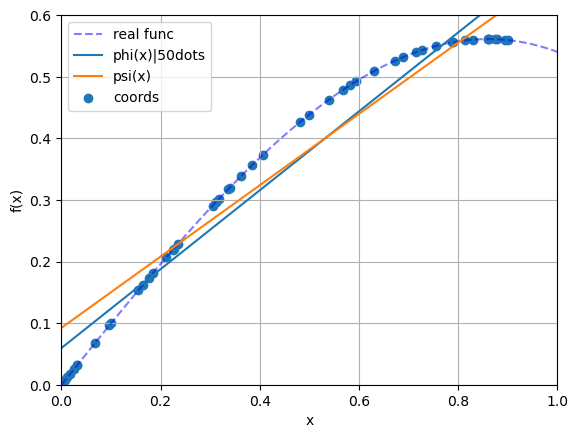

In [64]:
data = pd.DataFrame(generate_coords(50, 0, 1))
solution = system_solvers.reflection_method( 
    S(data['x'], 2),
    M(data['x'], 2))
coefficients = solution[0]

x = np.linspace(0, 1, 10000)

fig, ax = plt.subplots()
plt.plot(x, f(x), 'b--', alpha=0.5, label='real func')
ax.plot(x, phi(x, coefficients), label='phi(x)|50dots')
ax.plot(x, phi(x, [0.09229140113384744, 0.5789637790843772]), label='psi(x)')
ax.scatter(data['x'], data['f(x)'], label='coords')
ax.set_xlim(0, 1)
ax.set_ylim(-0., 0.6)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

In [65]:
np.sum((f(data['x']) - phi(data['x'], coefficients))**2)

0.09157970500209107

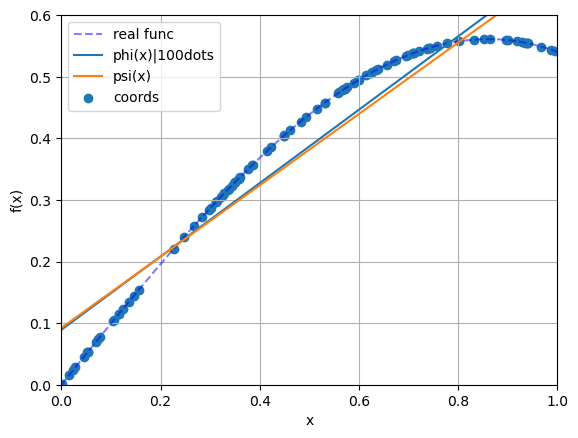

In [66]:
data = pd.DataFrame(generate_coords(100, 0, 1))
solution = system_solvers.reflection_method( 
    S(data['x'], 2),
    M(data['x'], 2))
coefficients = solution[0]

x = np.linspace(0, 1, 10000)

fig, ax = plt.subplots()
plt.plot(x, f(x), 'b--', alpha=0.5, label='real func')
ax.plot(x, phi(x, coefficients), label='phi(x)|100dots')
ax.plot(x, phi(x, [0.09229140113384744, 0.5789637790843772]), label='psi(x)')
ax.scatter(data['x'], data['f(x)'], label='coords')
ax.set_xlim(0, 1)
ax.set_ylim(-0., 0.6)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

In [67]:
np.sum((f(data['x']) - phi(data['x'], coefficients))**2)

0.27353063792537197

Заметим, что при 100 точках мы получаем, что обе приближающие функции, которые практически совпадают. Однако среднеквадратичное отклонение лишь растет. Потому что, вообще говоря, мы неверно считаем среднеквадратичное отклонение. Оно растет из-за роста точек. Соответственно его интерпретируемость хромает. Из теории математической статистики следует, что при построении линейной регрессии решается задача минимизации нормированного среднеквадратичного отклонения: 
$$MSE = \dfrac{1}{N} \sum\limits_{i=0}^N (f(x_i) - \varphi(x_i))^2 \to \min.$$
Множитель $\dfrac1N$ не влияет на достижение точки минимума, однако улучшит интерпретируемость данной целевой функции (или функции потерь):

In [68]:
np.mean((f(data['x']) - phi(data['x'], coefficients))**2)

0.00273530637925372

В итоге мы получаем среднеквадратичное отклонение, которое уже гораздо больше похоже на правдивое.

### Построение приближения многочленом второй степени

Попробуем приблизить данную дискретно заданную функцию на отрезке $[0,2]$ с помощью многочлена первой степени $$\varphi(x) = c_0 + c_1x + c_2x^2.$$
Приближающую функцию будем строить по 5 точкам.

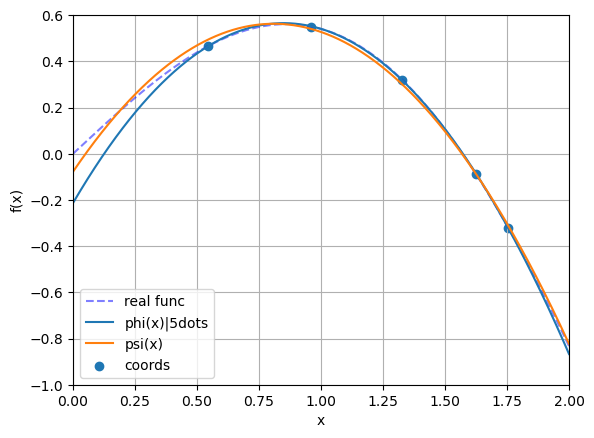

In [69]:
data = pd.DataFrame(generate_coords(5, 0, 2))
solution = system_solvers.reflection_method( 
    S(data['x'], 3),
    M(data['x'], 3))
coefficients = solution[0]

x = np.linspace(0, 2, 10000)

fig, ax = plt.subplots()
plt.plot(x, f(x), 'b--', alpha=0.5, label='real func')
ax.plot(x, phi(x, coefficients), label='phi(x)|5dots')
ax.plot(x, phi(x, [-0.07781671489208224, 1.582443699256859, -0.9775522318594997]), label='psi(x)')
ax.scatter(data['x'], data['f(x)'], label='coords')
ax.set_xlim(0, 2)
ax.set_ylim(-1, 0.6)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

Заметим, что уже 5 точек достаточно неплохо позволяют построить приближение для функции. Уже на этом этапе функции из непрерывного случая и из дискретного случая почти накладываются друг на друга. 

Рассчитаем среднеквадратичное отклонение:

In [70]:
np.mean((f(data['x']) - phi(data['x'], coefficients))**2)

2.4281874751295625e-06

Заметно, что уже сейчас среднеквадратичное отклонение достаточно малое. При добавлении большего числа точек мы имеем возможность также улучшить приближение. Например, возьмем теперь 100 точек и проверим, насколько изменится среднеквадратичное отклонение:

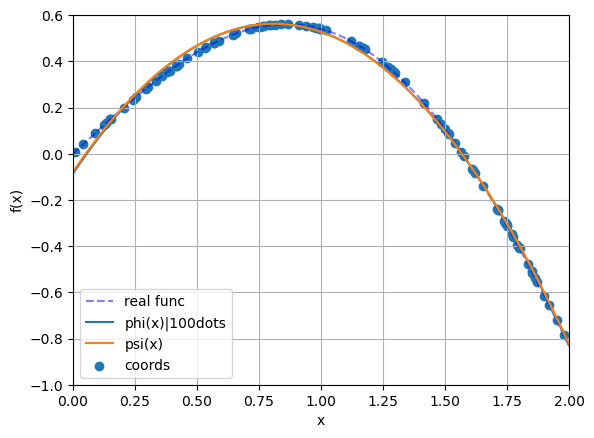

In [71]:
data = pd.DataFrame(generate_coords(100, 0, 2))
solution = system_solvers.reflection_method( 
    S(data['x'], 3),
    M(data['x'], 3))
coefficients = solution[0]

x = np.linspace(0, 2, 10000)

fig, ax = plt.subplots()
plt.plot(x, f(x), 'b--', alpha=0.5, label='real func')
ax.plot(x, phi(x, coefficients), label='phi(x)|100dots')
ax.plot(x, phi(x, [-0.07781671489208224, 1.582443699256859, -0.9775522318594997]), label='psi(x)')
ax.scatter(data['x'], data['f(x)'], label='coords')
ax.set_xlim(0, 2)
ax.set_ylim(-1, 0.6)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

In [72]:
np.mean((f(data['x']) - phi(data['x'], coefficients))**2)

0.00036670226573317033

Среднеквадратичное отклонение уменьшилось, а из графика видно, что обе функции практически совпадают.

### Вывод

Аппарат наилучшего среднеквадратичного приближения позволяет нам строить достаточно хорошие приближения функций на выбранном отрезке как в случае непрерывно заданной функции, так и в случае дискретно заданной функции. Основные различия заключаются лишь в пространствах, в которых мы работаем. Для непрерывного случая выбирается пространство $L_2$, а для дискретного -- евклидово со второй нормой.

### Дополнительные условия на задачу приближения функции заданной поточечно
В рамках поставленной задачи мы будем генерировать таблицу значений $x$ и $f(x)$, но для того, чтобы задача была более близкой к прикладной, каждая точка будет также получать случайное отклонение. 

Мы рассмотрим, насколько будут изменятся результаты приближения при изменении значения отклонения для точек.

Определим функцию для генерации таблицы $x$ и $f(x)$. Сперва возьмем отрезок $[0,2]$, на нем $5$ точек и отклонение $\delta = 0.05$.

In [73]:
def generate_stochastic_coords(n_points=1000, std=0.01, a=0, b=1):
    data = {}
    x = np.linspace(a, b, num=10000)
    data['x'] = np.sort(np.random.choice(x, size=n_points, replace=True))
    data['f(x)'] = data['x']*np.cos(data['x']) + np.random.normal(0, std, size=data['x'].shape[0])
    return data

data = pd.DataFrame(generate_stochastic_coords(5, 0.05, 0, 2))

Построим график исходной функции и сгенерированных точек на отрезке $[0,2]$:

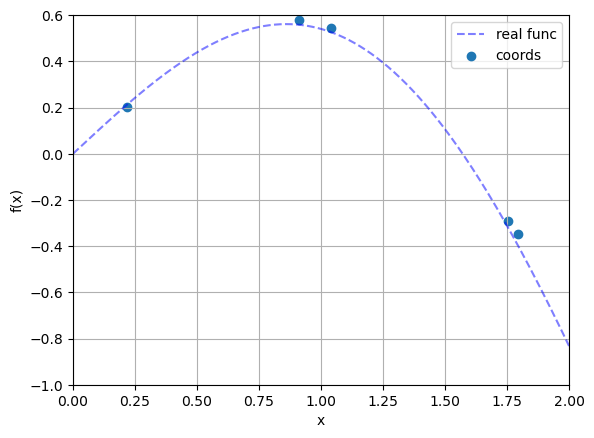

In [74]:
x = np.linspace(0, 2, 10000)

fig, ax = plt.subplots()
plt.plot(x, f(x), 'b--', alpha=0.5, label='real func')
ax.scatter(data['x'], data['f(x)'], label='coords')
ax.set_xlim(0, 2)
ax.set_ylim(-1, .6)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

Все наши механизмы для вычисления перенесем с прошлого случая на этот, так как алгоритм вычисления не изменится. 

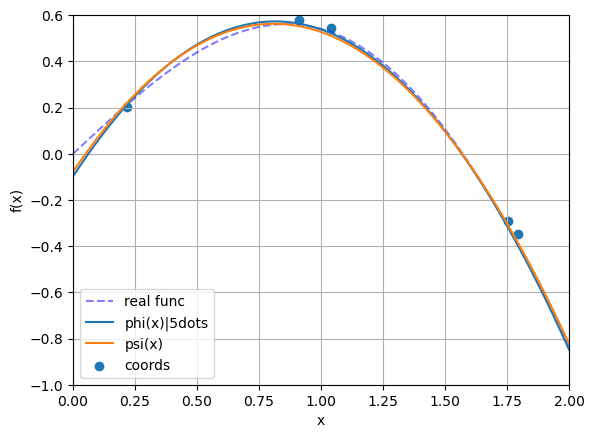

In [75]:
solution = system_solvers.reflection_method( 
    S(data['x'], 3),
    M(data['x'], 3))
coefficients = solution[0]

x = np.linspace(0, 2, 10000)

fig, ax = plt.subplots()
plt.plot(x, f(x), 'b--', alpha=0.5, label='real func')
ax.plot(x, phi(x, coefficients), label='phi(x)|5dots')
ax.plot(x, phi(x, [-0.07781671489208224, 1.582443699256859, -0.9775522318594997]), label='psi(x)')
ax.scatter(data['x'], data['f(x)'], label='coords')
ax.set_xlim(0, 2)
ax.set_ylim(-1, 0.6)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

В случае с отклонением $\delta = 0.05$ ничего особо не изменилось. Посмотрим, произойдут ли более крупные изменения при увеличении отклонения:

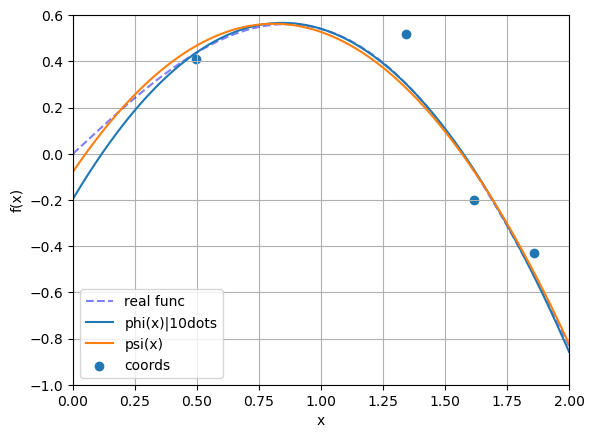

In [76]:
data = pd.DataFrame(generate_stochastic_coords(5, 0.15, 0, 2))
solution = system_solvers.reflection_method( 
    S(data['x'], 3),
    M(data['x'], 3))
coefficients = solution[0]

x = np.linspace(0, 2, 10000)

fig, ax = plt.subplots()
plt.plot(x, f(x), 'b--', alpha=0.5, label='real func')
ax.plot(x, phi(x, coefficients), label='phi(x)|10dots')
ax.plot(x, phi(x, [-0.07781671489208224, 1.582443699256859, -0.9775522318594997]), label='psi(x)')
ax.scatter(data['x'], data['f(x)'], label='coords')
ax.set_xlim(0, 2)
ax.set_ylim(-1, 0.6)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

Теперь $\delta = 0.15$. Заметим, что при увеличении отклонения алгоритм все также продолжает достаточно хорошо улавливать зависимость. Этот факт и позволяет применять метод наименьших квадратов в прикладных задачах анализа данных.

В качестве последнего примера рассмотрим поведение приближающего многочлена $5$ степени на отрезке $[-1, 7]$ в зависимости от расположения точек.

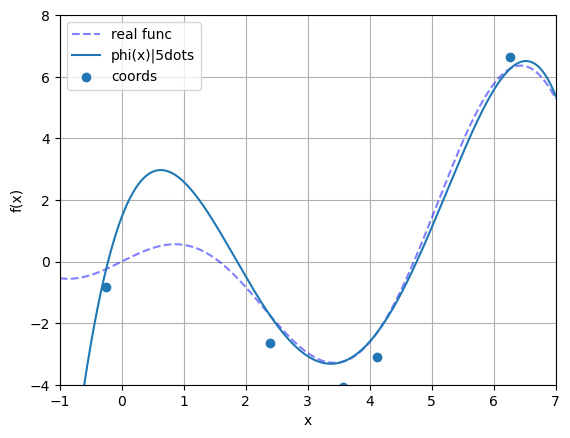

In [77]:
data = pd.DataFrame(generate_stochastic_coords(5, 1, -1, 7))
solution = system_solvers.reflection_method( 
    S(data['x'], 6),
    M(data['x'], 6))
coefficients = solution[0]

x = np.linspace(-1, 7, 10000)

fig, ax = plt.subplots()
plt.plot(x, f(x), 'b--', alpha=0.5, label='real func')
ax.plot(x, phi(x, coefficients), label='phi(x)|5dots')
ax.scatter(data['x'], data['f(x)'], label='coords')
ax.set_xlim(-1, 7)
ax.set_ylim(-4, 8)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

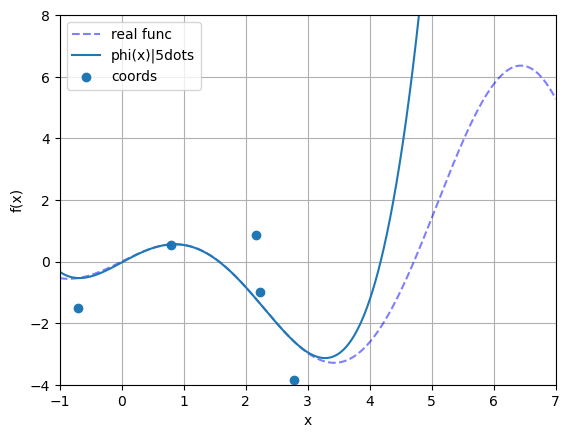

In [78]:
data = pd.DataFrame(generate_stochastic_coords(5, 1, -1, 7))
solution = system_solvers.reflection_method( 
    S(data['x'], 6),
    M(data['x'], 6))
coefficients = solution[0]

x = np.linspace(-1, 7, 10000)

fig, ax = plt.subplots()
plt.plot(x, f(x), 'b--', alpha=0.5, label='real func')
ax.plot(x, phi(x, coefficients), label='phi(x)|5dots')
ax.scatter(data['x'], data['f(x)'], label='coords')
ax.set_xlim(-1, 7)
ax.set_ylim(-4, 8)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

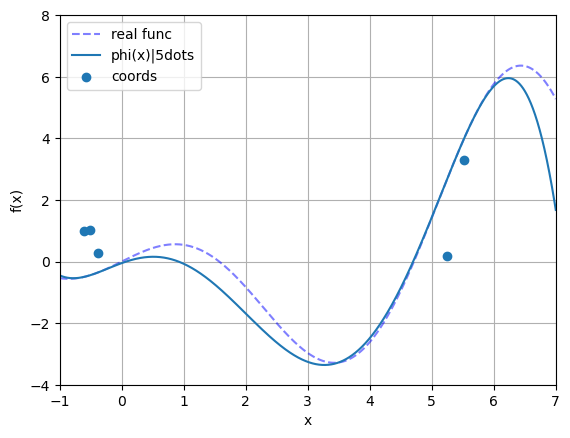

In [79]:
data = pd.DataFrame(generate_stochastic_coords(5, 1, -1, 7))
solution = system_solvers.reflection_method( 
    S(data['x'], 6),
    M(data['x'], 6))
coefficients = solution[0]

x = np.linspace(-1, 7, 10000)

fig, ax = plt.subplots()
plt.plot(x, f(x), 'b--', alpha=0.5, label='real func')
ax.plot(x, phi(x, coefficients), label='phi(x)|5dots')
ax.scatter(data['x'], data['f(x)'], label='coords')
ax.set_xlim(-1, 7)
ax.set_ylim(-4, 8)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

Теперь заметно, что расположение точек крайне влияет на поведение приближающей функции. Чем дальше точки находятся друг от друга, тем точнее будет результат. Чем ближе точки друг к другу, тем хуже алгоритм может уловить истинную зависимость.

Но если же взять степень многочлена гораздо большую, например 25, то алгоритм уже перестанет улавливать зависимость, а будет стараться просто построить такую функцию, которая будет как можно лучше проходить через точки.

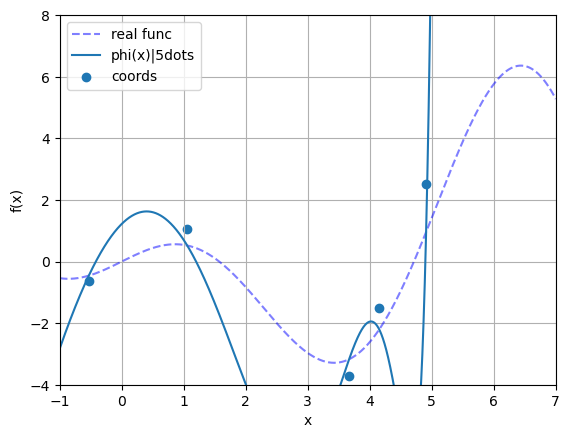

In [86]:
data = pd.DataFrame(generate_stochastic_coords(5, 1, -1, 7))
solution = system_solvers.reflection_method( 
    S(data['x'], 25),
    M(data['x'], 25))
coefficients = solution[0]

x = np.linspace(-1, 7, 10000)

fig, ax = plt.subplots()
plt.plot(x, f(x), 'b--', alpha=0.5, label='real func')
ax.plot(x, phi(x, coefficients), label='phi(x)|5dots')
ax.scatter(data['x'], data['f(x)'], label='coords')
ax.set_xlim(-1, 7)
ax.set_ylim(-4, 8)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.legend()
plt.grid()
plt.show()

### Вывод

При наличии некоторого шума в значениях точек метод наименьших квадратов также позволяет улавливать истинную зависимость исходной функции. Но результат его работы будет сильно зависеть от расположения точек, числа точек. А также от того, насколько хорошо подходит степень многочлена под выявление зависимости. При слишком малых или слишком больших степенях приближающего многочлена алгоритм может не уловить истинной зависимости.